In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

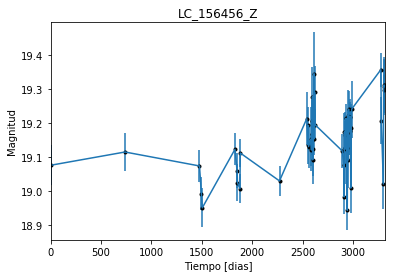

In [2]:
data = np.genfromtxt('LC_156456_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_156456_Z')
plt.savefig("LC_156456_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

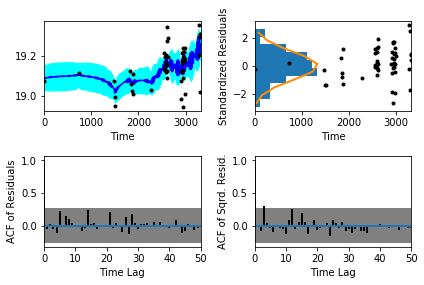

In [5]:
sample.assess_fit()

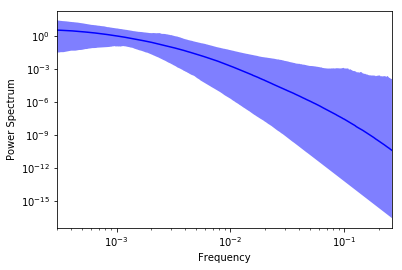

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

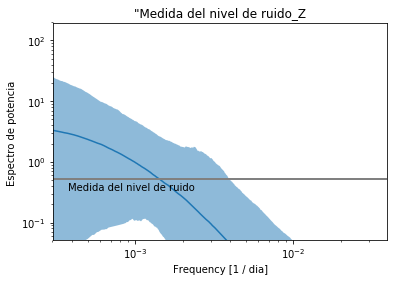

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_156456_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_156456_Z')

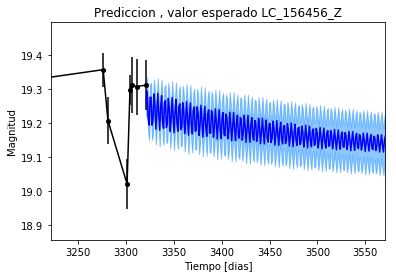

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_156456_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_156456_Z')

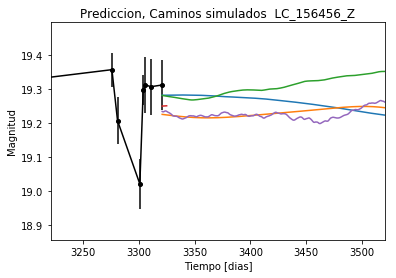

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_156456_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


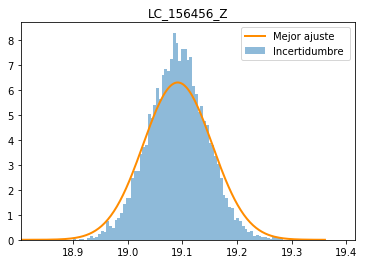

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_156456_Z')
plt.savefig("Mejor_ajuste_LC_156456_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_156456_Z')

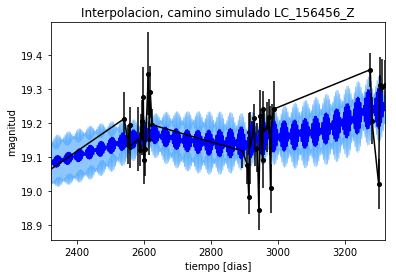

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_156456_Z')

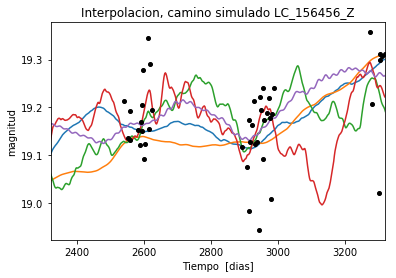

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 597.302936008
Median: 0.00697734046053
Standard deviation: 0.0982868418031
68% credibility interval: [ 0.00075689  0.09649513]
95% credibility interval: [  3.62275676e-04   3.89528389e-01]
99% credibility interval: [  3.09164440e-04   4.87696677e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 461.434676818
Median: 0.00183591969075
Standard deviation: 0.0441580749828
68% credibility interval: [ 0.00048947  0.01799738]
95% credibility interval: [ 0.00032611  0.13450749]
99% credibility interval: [  3.05607280e-04   3.14053877e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1324.03142758
Median: 0.0179902411494
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 996.35220061
Median: 78.3196616005
Standard deviation: 1.57333027497
68% credibility interval: [ 76.59481728  79.44026216]
95% credibility interval: [ 74.07653602  80.11815002]
99% credibility interval: [ 72.16642813  81.08507847]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 344.852097041
Median: 0.489555310583
Standard deviation: 1.12736649141
68% credibility interval: [ 0.06215351  2.11152268]
95% credibility interval: [ 0.0162126   3.78585779]
99% credibility interval: [ 0.01059803  5.39776879]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 606.029562303
Median: 0.216112000159
Standard deviation: 2.43243386197
68% credibility interval: [ 0.00944313  2.75450829]
95% credibility interval: [  6.48625696e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0911401
Median: 8.22660519808e-42
Standard deviation: 4.63318157478e+50
68% credibility interval: [  1.22246003e-109   7.17334985e-008]
95% credibility interval: [  1.41803407e-158   3.86956490e+026]
99% credibility interval: [  9.70039966e-169   1.05649873e+038]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2793.03739662
Median: 19.1229347266
Standard deviation: 0.0480128429193
68% credibility interval: [ 19.0814067   19.16029621]
95% credibility interval: [ 19.02408324  19.21499084]
99% credibility interval: [ 18.97211091  19.27317814]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 381.880910981
Median: 0.0094946236479
Standard deviation: 0.130008341865
68% credibility interval: [ 0.          0.22214331]
95% credibility interval: [ 0.         0.4450155]
99% credibility interval: [ 0.          0.51183649]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 381.880910981
Median: 0.0094946236479
Standard deviation: 0.130008341865
68% credibility interval: [ 0.          0.22214331]
95% credibility interval: [ 0.         0.4450155]
99% credibility interval: [ 0.          0.51183649]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 11126.4860786
Median: 0.0
Standard deviation: 0.0054859457183
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 996.35220061
Median: 78.3196616005
Standard deviation: 1.57333027497
68% credibility interval: [ 76.59481728  79.44026216]
95% credibility interval: [ 74.07653602  80.11815002]
99% credibility interval: [ 72.16642813  81.08507847]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2662.05172955
Median: 0.00792361228152
Standard deviation: 0.0130752296155
68% credibility interval: [ 0.00433581  0.01605973]
95% credibility interval: [ 0.00250631  0.03937954]
99% credibility interval: [ 0.00170886  0.08259995]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1566.94128229
Median: 1.29594796902
Standard deviation: 0.196248487772
68% credibility interval: [ 1.11386341  1.49948607]
95% credibility interval: [ 0.96612528  1.74671246]
99% credibility interval: [ 0.86326693  1.86982752]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1484.28400133
Median: 3.07615563269e-05
Standard deviation: 0.0217800734812
68% credibility interval: [  3.60634356e-07   1.44698026e-03]
95% credibility interval: [  1.87893175e-30   3.58989331e-02]
99% credibility interval: [  1.61599672e-40   1.08245824e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 597.302936008
Median: (-0.0438399230648+0j)
Standard deviation: 1.0240333838
68% credibility interval: [-0.60629677-3.00022666j -0.00475570-0.22191356j]
95% credibility interval: [ -2.44747905e+00-2.25902203j  -2.27624520e-03-2.66957288j]
99% credibility interval: [ -3.06428859e+00+0.j          -1.94253747e-03-0.03336837j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 461.434676818
Median: (-0.0115354236261+0.0190837973302j)
Standard deviation: 0.862699980165
68% credibility interval: [-0.11308088+0.27381808j -0.00307541+0.22113167j]
95% credibility interval: [-0.84513552+0.64633139j -0.00204902+0.j        ]
99% credibility interval: [ -1.97325870e+00+2.89847609j  -1.92018717e-03+0.j        ]
Posterior summary for pa